# Introduction to Quantum Computing with IBM Qiskit

### Pre-requisites

1. Qiskit
2. qiskit-aer
2. qiskit[visualization] (optional: for visualize circuit with matplotlib)

For more information on how to install IBM Qiskit, please refer to the [documentation](https://qiskit.org/documentation/getting_started.html).

In [ ]:
!pip install -q qiskit
!pip install -q qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.8 MB/s eta 0:00:00




---



### Hands-on
After this we can begin coding with IBM Qiskit 🙌

#### Hello World with QisKit Composer

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basicaer import BasicAerProvider
from qiskit import transpile

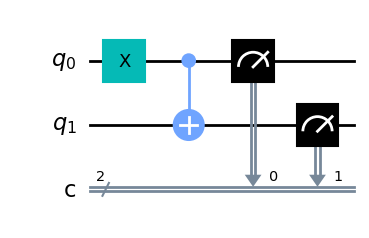

In [ ]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])

circuit.draw('mpl')

In [ ]:
# List all basic provider
BasicAerProvider().backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

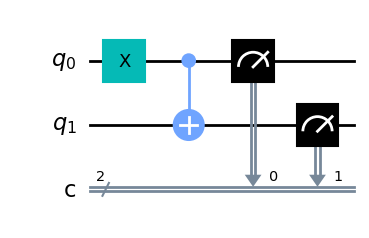

In [ ]:
backend = BasicAerProvider().get_backend('qasm_simulator') # Use qasm_simulator
transpiled_circuit = transpile(circuit, backend)

transpiled_circuit.draw('mpl')

The traspiled circuit is the same, because simulator support all gate and qubit entanglement.

In [ ]:
# Run the transpiled circuit using the qasm_simulator
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(counts)

{'11': 1024}


#### Exercise 1: Half-Adder
Create Half-Adder Quantum Circuit with Qiskit Composer

Hint: Here is the documentation for Fake provider ([link](https://qiskit.org/documentation/apidoc/providers_fake_provider.html))

Pseudocode for Half-Adder circuit

```python
#XOR
CNOT(q[1], q[2])
CNOT(q[0], q[2])
#AND
CCNOT(q[0], q[1], q[3])
#Sum
Measure(q[2], c[0])
#Carry out
Measure(q[3], c[1])
```

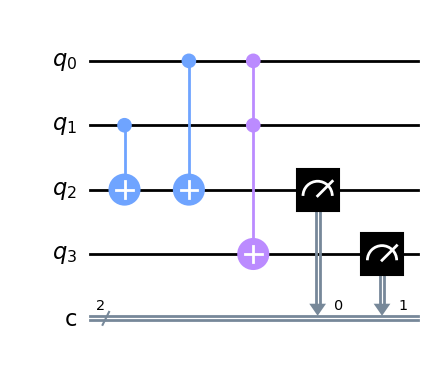

In [ ]:
qr = QuantumRegister(4, 'q')
cr = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qr, cr)

# XOR
circuit.cx(qr[1], qr[2])
circuit.cx(qr[0], qr[2])

# AND
circuit.ccx(qr[0], qr[1], qr[3])

# Sum
circuit.measure(qr[2], cr[0])
circuit.measure(qr[3], cr[1])

circuit.draw('mpl')

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/fake_backend.py:354: RuntimeWarning: Aer not found using BasicAer and no noise
  warnings.warn("Aer not found using BasicAer and no noise", RuntimeWarning)


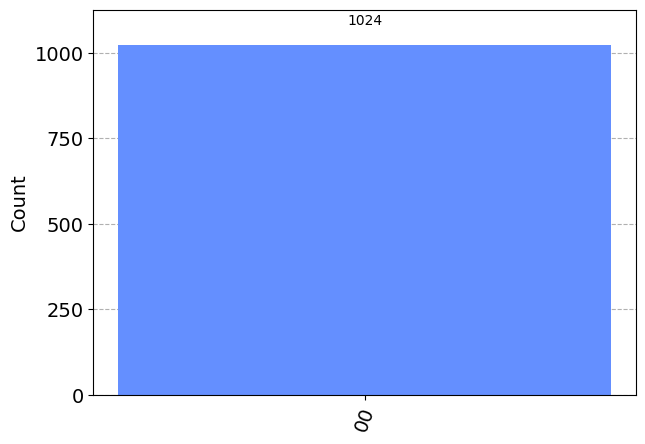

In [ ]:
from qiskit.providers.fake_provider import FakeLimaV2
from qiskit.tools.visualization import plot_histogram

backend = FakeLimaV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

#### Exercise 2 : Phase Change with Bloch Sphere
(Show in IBMQ circuit composer
)

#### Exercise 3 Hello Quantum with Bell State


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basicaer import BasicAerProvider
from qiskit.tools.visualization import plot_histogram

In [ ]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(qr,cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])

circuit.draw('mpl')

backend = BasicAerProvider().get_backend('qasm_simulator')

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)

# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()

In [ ]:
print(counts)

{'11': 506, '00': 518}


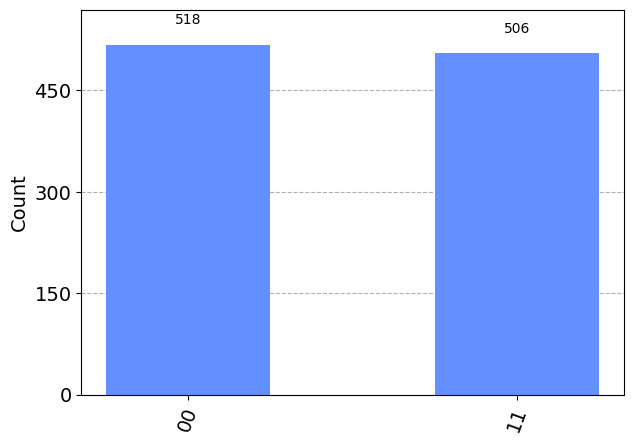

In [ ]:
plot_histogram(counts)

#### Extra: Summit Job to Quantum Device

In [ ]:
!pip install -q qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.0 MB/s eta 0:00:00


In [ ]:
from qiskit import IBMQ
IBMQ.save_account('<API Token>')

In [ ]:
from qiskit.providers.ibmq import least_busy

IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend_lb = least_busy(provider.backends(simulator=False, operational=True))
print("LB backend: ", backend_lb)

In [ ]:
circuit.draw('mpl')

In [ ]:
# This block of code take long time to run!!, since we sent our circuit to real quantum device

from qiskit.tools.monitor import job_monitor
from qiskit import execute

backend = backend_lb
shots = 1024
job_exp = execute(circuit, backend=backend, shots=shots)
job_monitor(job_exp, interval = 2)

results = job_exp.result()
count_dev = results.get_counts()

In [ ]:
plot_histogram(count_dev)